In [1]:
"""
Author: Z Yan from Florida State University
Date: 2021/09/26
Trial of Interpolation using Autoencoder as Interpolator which is a method of deep learning
"""
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf

df = pd.read_csv("C:/Users/yanzh/Desktop/BB17.csv")
time = df['Time'].values
chlorophylla = df['Chlorophylla'].values
df

,Time,Chlorophylla
0,0.000000,0.025834
1,0.002903,0.013621
2,0.005805,0.038046
3,0.008708,0.035228
4,0.011611,0.073744
...,...,...
295,0.986938,0.104744
296,0.989840,0.254110
297,0.993470,0.106623
298,0.996371,0.116956


In [55]:
'''
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(time, chlorophylla)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.3)
print(x_train.shape, x_valid.shape, x_test.shape)
# Overfitting is good or not good?
'''

model = tf.keras.Sequential() #Construct model and layers
model.add(tf.keras.layers.Dense(units = 1, activation = 'linear', input_shape=[1]))
model.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 64, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 32, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 64, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 1, activation = 'linear'))
model.compile(loss='mse', optimizer="adam") #Used to configure model training, include loss function, optimizer and many others
model.summary()
# Training
model.fit(time, chlorophylla, epochs=1000, verbose=True)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_50 (Dense)             (None, 128)               256       
_________________________________________________________________
dense_51 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_52 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_53 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_54 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_55 (Dense)             (None, 1)                

In [56]:
#Transform the normalized scale to real scale
chlorophylla_min = 0.125
chlorophylla_max = 10.77

newtimepoints_scaled = np.linspace(time[0] - (time[1] - time[0]),time[-1], 10000)
y_predicted_scaled = model.predict(newtimepoints_scaled)

newtimepoints = newtimepoints_scaled*(44355.4097222222 - 34709.00) + 34709.00
y_predicted = y_predicted_scaled*(chlorophylla_max - chlorophylla_min) + chlorophylla_min

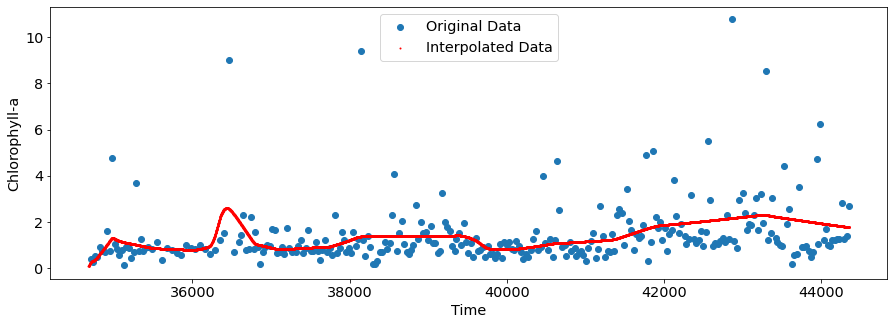

In [57]:
# Display the result
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
plt.scatter(time*(44355.4097222222 - 34709.00) + 34709.00, chlorophylla*(10.77 - 0.125) + 0.125, label='Original Data')
plt.scatter(newtimepoints, y_predicted, c = 'red', s = 1, label = 'Interpolated Data')
plt.xlabel('Time')
plt.ylabel('Chlorophyll-a')
plt.legend()
plt.show()

In [58]:
model.evaluate(newtimepoints_scaled, y_predicted_scaled, batch_size=32)

313/313 [==============================] - 0s 330us/step - loss: 5.6609e-17


5.660923018569952e-17

In [59]:
print(model.metrics_names)

['loss']


In [60]:
interpolation = model.predict([0.078682123
,0.084798389
,0.091121985
,0.097445581
,0.103769177
,0.110092773
,0.116520035
,0.1226363
,0.128959897
,0.135283493
,0.141607089
,0.147930685
,0.154357947
,0.160474212
,0.166797808
,0.173121405
,0.179445001
,0.185768597
,0.192195859
]
)

In [61]:
interpolation

array([[0.07159985],
       [0.06924208],
       [0.06810406],
       [0.06684305],
       [0.06573614],
       [0.06511047],
       [0.06447499],
       [0.06390619],
       [0.06334412],
       [0.06285036],
       [0.06506377],
       [0.0687179 ],
       [0.0748723 ],
       [0.09562138],
       [0.15370284],
       [0.21356192],
       [0.23328893],
       [0.2187964 ],
       [0.19319665]], dtype=float32)

In [62]:
!mkdir -p saved_model
model.save('saved_model/my_model')

INFO:tensorflow:Assets written to: saved_model/my_model\assets


In [64]:
new_model = tf.keras.models.load_model('saved_model/my_model')

# Check its architecture
new_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_50 (Dense)             (None, 128)               256       
_________________________________________________________________
dense_51 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_52 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_53 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_54 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_55 (Dense)             (None, 1)                